# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

In [3]:
### Use of seaborn was approved during live session 

import seaborn as sns

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

Wine Quality (PMLB - red subset only) chosen to be analyzed in this project 
    - Dataset winequality-red.csv was downloaded and added directly to github repository 

In [4]:
# Load the Dataset

df = pd.read_csv('winequality-red.csv', delimiter=';') # Load .csv file using Pandas Framework and storing the Dataframe in the variable df
# After inspecting the data with df.head(), realized delimiter ';' was needed to properly parse the data

In [5]:
# Show a Random Sample of 10 Rows

# Almost used df.head(n=10) to show 10 rows of data from the Data Frame this would not be a random sample. 

rows_10 = df.sample(n=10) # Select a random sample of 10 rows and store in variable row_10.
rows_10

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
859             6.8              0.56         0.22             1.8      0.074   
788            10.0              0.56         0.24             2.2      0.079   
1212            6.8              0.65         0.02             2.1      0.078   
1100            8.4              0.34         0.42             2.1      0.072   
81              7.8              0.43         0.70             1.9      0.464   
748             7.2              0.50         0.18             2.1      0.071   
183             6.8              0.61         0.20             1.8      0.077   
164             7.3              0.59         0.26             7.2      0.070   
201             8.8              0.37         0.48             2.1      0.097   
293             6.9              0.36         0.25             2.4      0.098   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
859                  15.0                  24.0  0.99438  3.40       0.82   
788                  19.0                  58.0  0.99910  3.18       0.56   
1212                  8.0                  15.0  0.99498  3.35       0.62   
1100                 23.0                  36.0  0.99392  3.11       0.78   
81                   22.0                  67.0  0.99740  3.13       1.28   
748                  12.0                  31.0  0.99761  3.52       0.72   
183                  11.0                  65.0  0.99710  3.54       0.58   
164                  35.0                 121.0  0.99810  3.37       0.49   
201                  39.0                 145.0  0.99750  3.04       1.03   
293                   5.0                  16.0  0.99640  3.41       0.60   

      alcohol  quality  
859      11.2        6  
788      10.1        6  
1212     10.4        6  
1100     12.4        6  
81        9.4        5  
748       9.6        6  
183       9.3        5  
164       9.4        5  
201       9.3        5  
293      10.1        6

In [6]:
# Check Dataset for Missing Data

df.info()  # Checking out infomation of dataset such as column names, null counts and datatypes
### Command shows that there are 1599 entries from index 0 to 1598 and all columns have a non_null count of 1599

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Double Checking for Missing Data

#Based on the information gathered from df.info() command, the next two commands are not needed but will confirm that the dataset contains no missing data

dfisnull = df.isnull().sum().sum() # Checks dataset for null values and gathers a total sum and stores value in dfisnull
print(f'Total Amount of Null Values in Dataset: {dfisnull}') # Print out null values counts
dfisna = df.isna().sum().sum() # Checks datset for na values and gathers total sum and stores value in dfisna
print(f'Total Amount of NA Values in Dataset: {dfisna}') # Print out na value counts



Total Amount of Null Values in Dataset: 0
Total Amount of NA Values in Dataset: 0


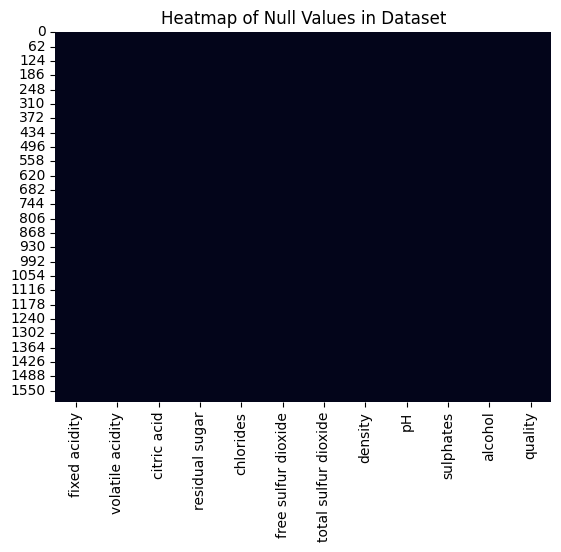

In [8]:
# Double Checking for Missing Data with Graphs

# Thought it would be fun to visualize the lack of nulls although this is really not needed. Here is a black square!
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Null Values in Dataset"); # Add title to heatmap

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [9]:
# List all columns in Dataset

df # DataFrame variable created in Problem One
column_list = df.columns.tolist() # Create variable column_list and store the list of columns from the red-wine dataset
column_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [10]:
# As per the instructions in Problem One, descriptions are only required for first ten columns but dataset only contains a total of twelve column so will complete for all

# Overview of columns and descriptions
 
#'fixed acidity': The amount of non-floating acid in the wine, which can not be easily evaporated
#'volatile acidity': The amount of floating acid in the wine, which can effect the smell of the wine
#'citric acid': Acid that adds a zesty flavor to wine
#'residual sugar': Total sugar left over after frementation process have completed
#'chlorides': Common salt content featured in the wine
#'free sulfur dioxide': Agent added to wine which helps prevent it from spoiling that is free and not currently working 
#'total sulfur dioxide': Total agents added to wine which helps prevent it from spoiling that is free and currently working
#'density': Thickness of the wine mainly determined by how much alchol and sugar content it contains
#'pH': A scale from acidic (0) to basic (14)
#'sulphates': Agent added to wine which helps prevents oxidization and growth of microorganisms 
#'alcohol': The percentage of alchol in the wine
#'quality': Rating of wine based on taste from a scale of 0 to 10 (with 0 being the worst and 10 being the best) 


In [11]:
# Store Column Description in Variable

column_description = [     

'The amount of non-floating acid in the wine, which can not be easily evaporated',
'The amount of floating acid in the wine, which can effect the smell of the wine',
'Acid that adds zesty flavor to wine',
'Total sugar left over after frementation process have completed',
'Common salt content featured in the wine',
'Agent added to wine which helps prevent it from spoiling that is free and not currently working',
'Total agents added to wine which helps prevent it from spoiling that is free and currently working',
'Thickness of the wine mainly determined by how much alchol and sugar content it contains',
'A scale from acidic (0) to basic (14)',
'Agent added to wine which helps prevents oxidization and growth of microorganisms',
'The percentage of alchol in the wine',
'Rating of wine based on taste from a scale of 0 to 10 (with 0 being the worst and 10 being the best)'

] # Variable created to store column descriptions


In [12]:
# Create Dictionary with Column Names, Data Types and Column Descriptions

description = {
    'Column Names': column_list, #using list of column names stored in previous step
    'Data Type': ['float64','float64','float64','float64','float64','float64','float64','float64','float64','float64','float64','int64'],
    'Description': column_description # descriptions given in same order as column name to simplify the process
}

df_description = pd.DataFrame(description) # Create Data Frame of dictionary and store in variable df_description

In [13]:
# Create Markdown Table with List of Columns

description_table = df_description.to_markdown(index=False, tablefmt="pipe") # Create markdown table of column names, datatypes, and column descriptions
## Issue with to_markdown is that is can cause error for tabulate module, but tablefmt='pipe' should not need tabulate module.
print(description_table) # Print markdown table

| Column Names         | Data Type   | Description                                                                                          |
|:---------------------|:------------|:-----------------------------------------------------------------------------------------------------|
| fixed acidity        | float64     | The amount of non-floating acid in the wine, which can not be easily evaporated                      |
| volatile acidity     | float64     | The amount of floating acid in the wine, which can effect the smell of the wine                      |
| citric acid          | float64     | Acid that adds zesty flavor to wine                                                                  |
| residual sugar       | float64     | Total sugar left over after frementation process have completed                                      |
| chlorides            | float64     | Common salt content featured in the wine                                                             |
| free

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [14]:
# Perform Exploratory Analysis on the Dataset

df # DataFrame variable created in Problem One

df.info() # Get data types for columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
# Check Dataset for Duplicate Records

duplicate_sum = df.duplicated().sum() # Create variable duplicate_sum and store counts of duplicated records 
print(f'Red Wine Dataset contains {duplicate_sum} duplicate records.') # Print out duplicate row counts

Red Wine Dataset contains 240 duplicate records.


In [16]:
# Remove duplicate rows from DataFrame variable

df_without_duplicates = df.drop_duplicates() # Create variable df_without_duplicates to store data without duplicate records
without_duplicate_sum = df_without_duplicates.duplicated().sum() # Create variable without_duplicate_sum and store counts of duplicated records
print(f'Red Wine Dataset now contains {without_duplicate_sum} duplicate records after duplicates were removed.') # Print out duplicated row counts

# Use df without duplicates for the rest of the analysis

Red Wine Dataset now contains 0 duplicate records after duplicates were removed.


In [17]:
# Sample Non Duplicated Dataset

df_without_duplicates.sample(n=5) # Return five rows of sample data from dataframe without duplicated records

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
230             5.2              0.48         0.04             1.6      0.054   
1124            6.5              0.58         0.00             2.2      0.096   
1321            5.0              0.74         0.00             1.2      0.041   
1045            6.9              0.44         0.00             1.4      0.070   
733             7.0              0.45         0.34             2.7      0.082   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
230                  19.0                 106.0  0.99270  3.54       0.62   
1124                  3.0                  13.0  0.99557  3.62       0.62   
1321                 16.0                  46.0  0.99258  4.01       0.59   
1045                 32.0                  38.0  0.99438  3.32       0.58   
733                  16.0                  72.0  0.99800  3.55       0.60   

      alcohol  quality  
230      12.2        7  
1124     11.5        4  
1321     12.5        6  
1045     11.4        6  
733       9.5        5

In [18]:
# Get Numeric Column Statistics 

df_without_duplicates.describe() # Generate statistics such as min, max, etc on all numeric columns 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

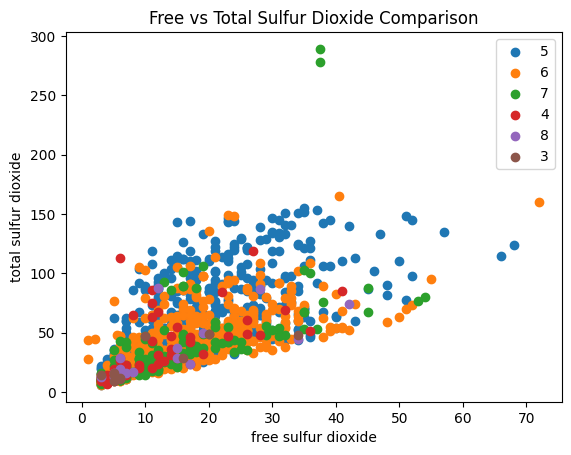

In [19]:
# Exploratory Analysis By Creating Pair of Columns Scatter Plot

x_column = 'free sulfur dioxide'
y_column = 'total sulfur dioxide'

for w in df_without_duplicates['quality'].unique():
    wine_w = df_without_duplicates.query("quality == @w")
    plt.scatter(wine_w[x_column],wine_w[y_column], label=w)
plt.title("Free vs Total Sulfur Dioxide Comparison")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend();

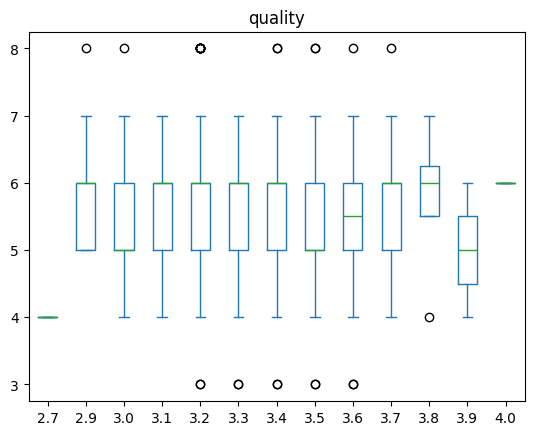

In [20]:
# Exploratory Analysis By Creating Box Plots

df_rounded = df_without_duplicates.copy()
df_rounded['pH'] = df_rounded['pH'].round(1)
df_rounded.plot.box(column='quality', by='pH')
None

<Figure size 300x300 with 0 Axes>

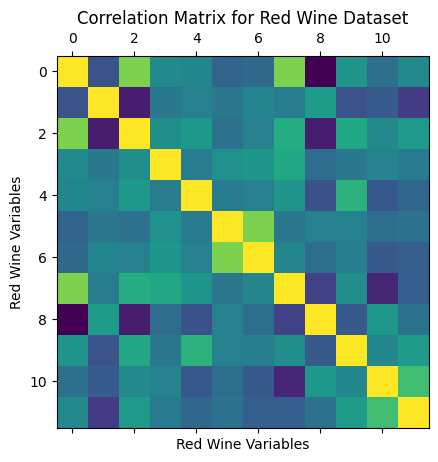

In [21]:
# Exploratory Analysis By Creating a Correlation Matrix (Although used for Problem 4, this is an import step in exporatory analysis)

plt.figure(figsize=(3,3))
plt.matshow(df_without_duplicates.corr())
plt.title('Correlation Matrix for Red Wine Dataset')
plt.xlabel('Red Wine Variables')
plt.ylabel('Red Wine Variables');


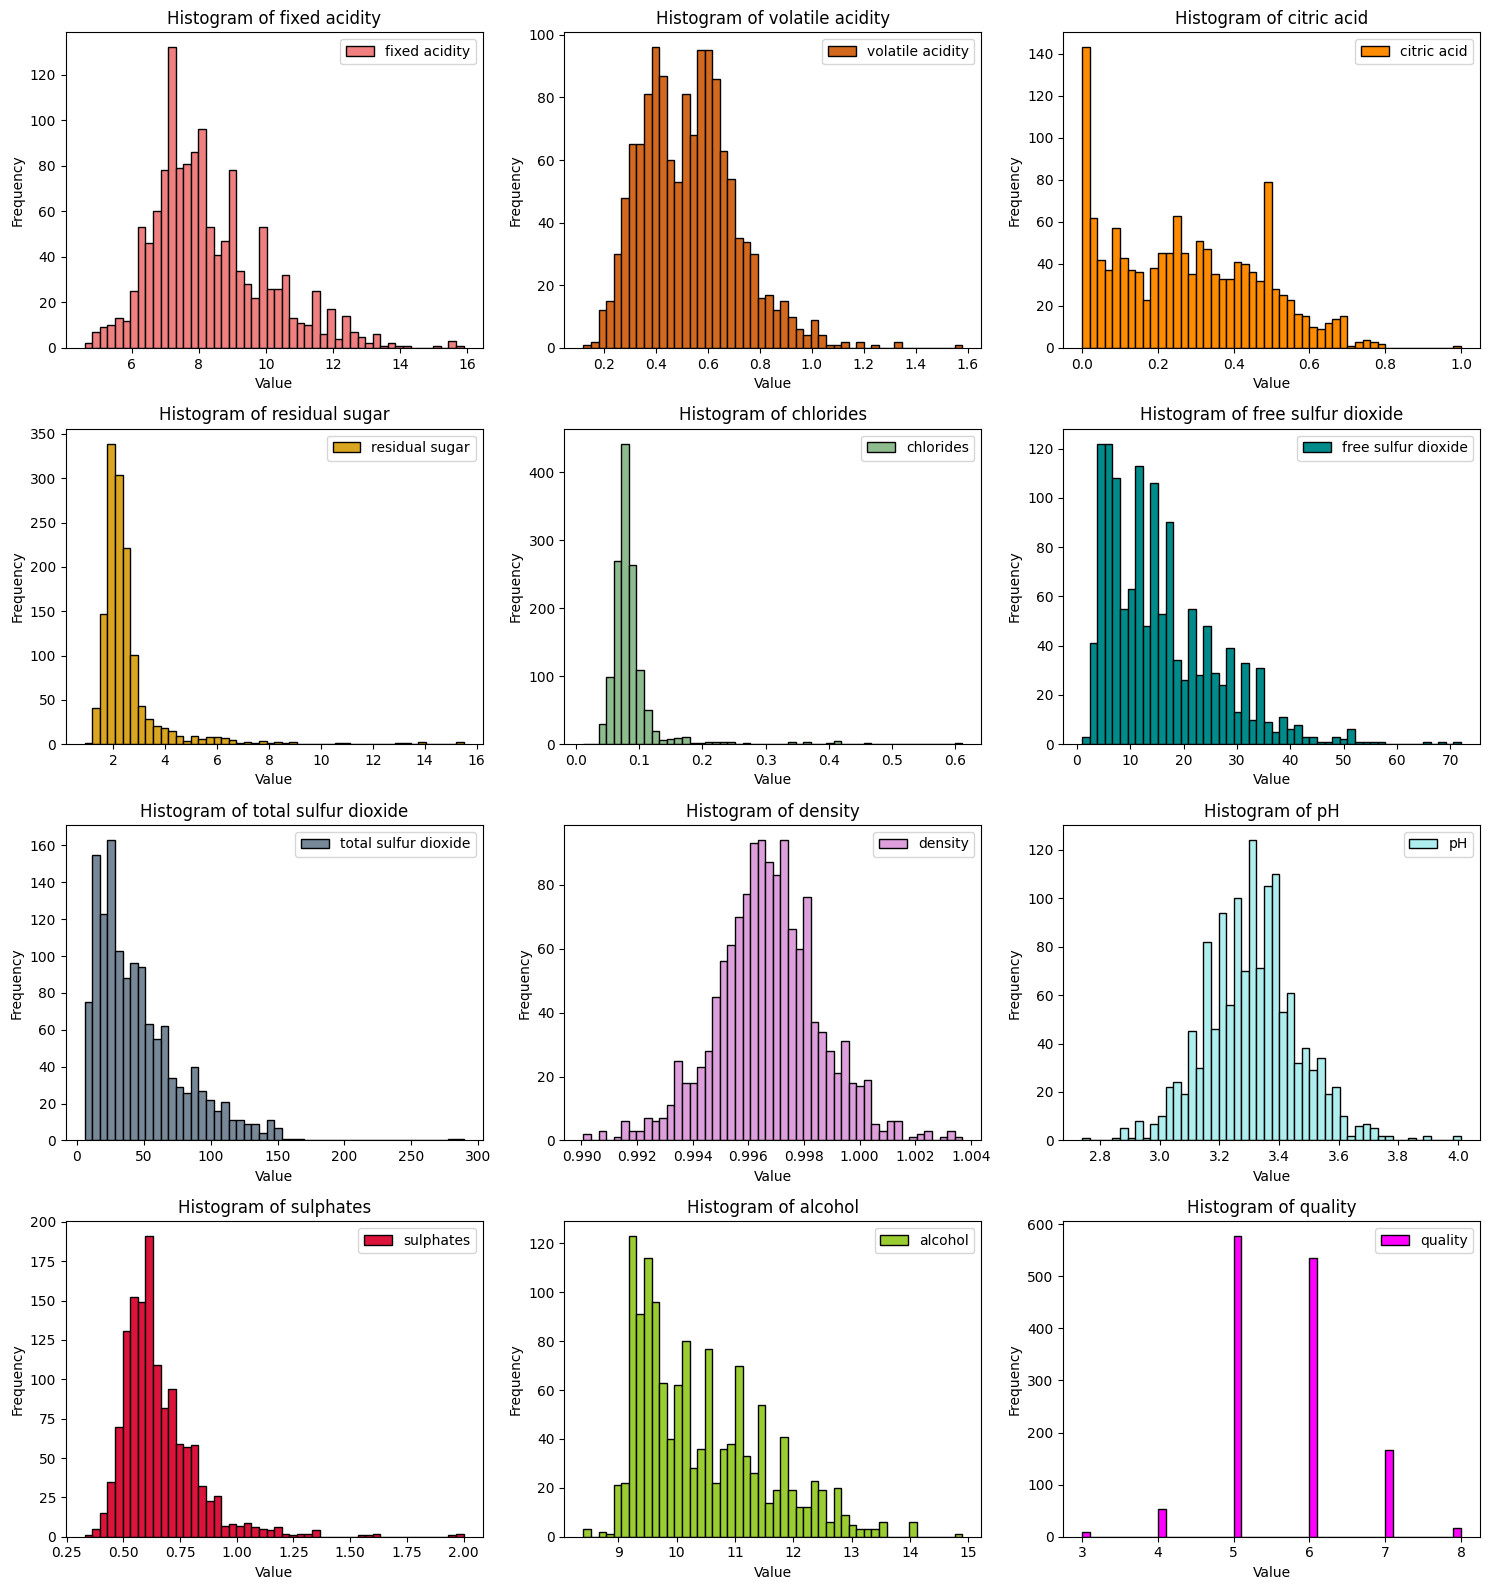

In [23]:
# Exploratory Analysis By Creating Histograms

n_cols = 3 # Number of Columns for Subplots
n_rows = 4 # Number of Rows for Subplots  

fig,axs = plt.subplots(n_rows,n_cols,figsize=(5* n_cols, 4 * n_rows)) 
axs = axs.flatten()

colors=['lightcoral','chocolate','darkorange','goldenrod','darkseagreen','darkcyan','lightslategrey','plum','paleturquoise','crimson','yellowgreen','fuchsia']  # Create unique color chart for histograms

column_list # List of column names created in earlier Problem Two

for i, col in enumerate(column_list):
    ax = axs[i]
    ax.hist(df_without_duplicates[col], edgecolor='black', label=col, color=colors[i % len(colors)], bins=50)
    ax.legend();
    ax.set_title(f'Histogram of {column_list[i]}', fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency');

plt.tight_layout()
plt.show(); 

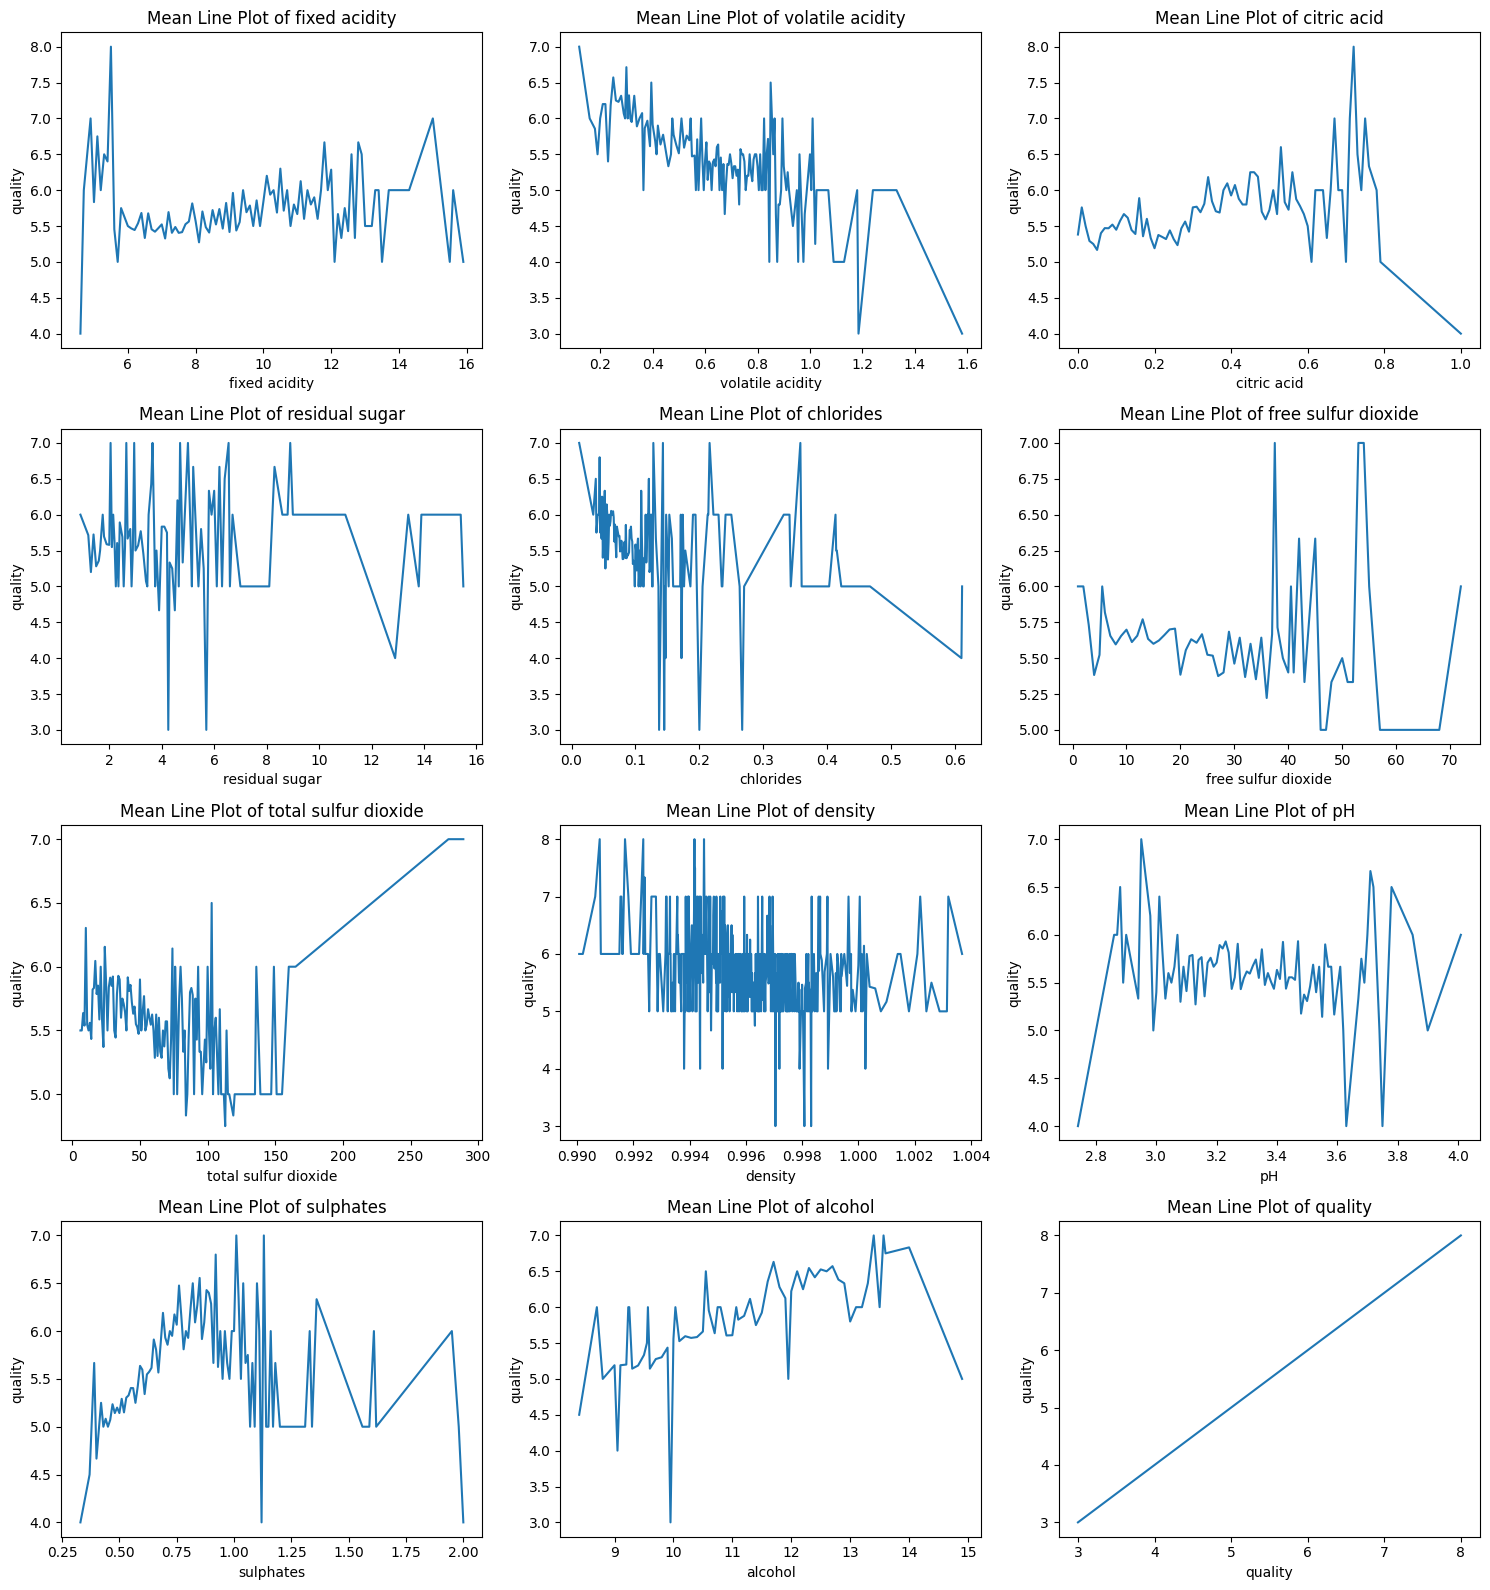

In [24]:
# Exploratory Analysis By Creating Mean Line Plots

n_cols = 3 # Number of Columns for Subplots
n_rows = 4 # Number of Rows for Subplots

plt.figure(figsize=(5* n_cols, 4 * n_rows))
for i, col in enumerate(column_list):
    plt.subplot(n_rows, n_cols, i + 1)
    df_w = df_without_duplicates.groupby(col)['quality'].mean()
    df_w.plot(y='quality')
    plt.title(f'Mean Line Plot of {column_list[i]}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('quality')

plt.tight_layout()
plt.show(); 

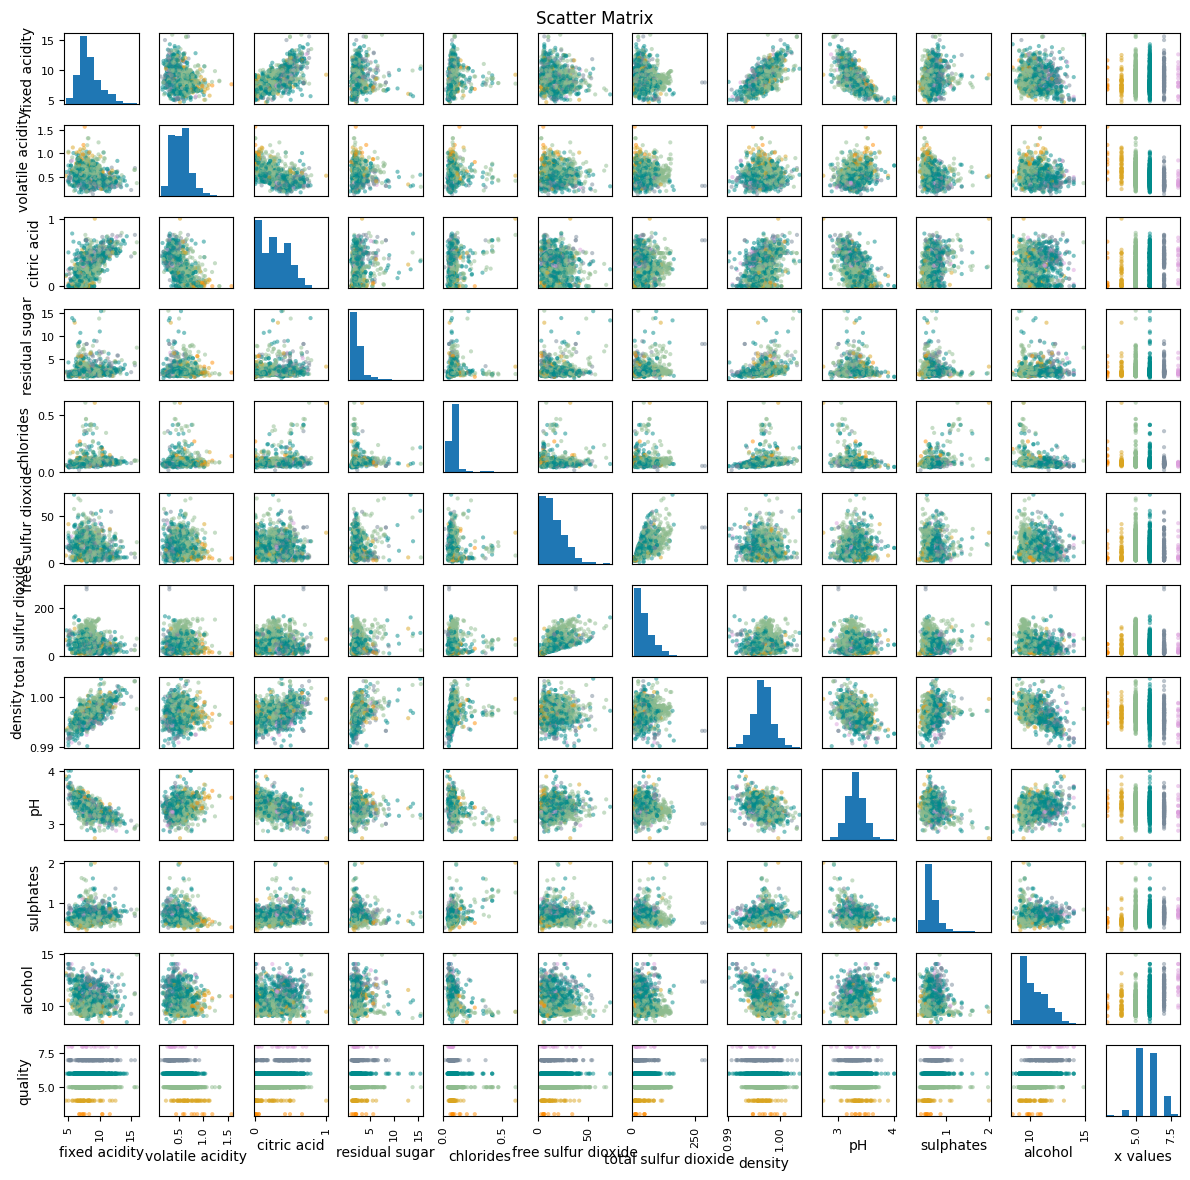

In [25]:
# Exploratory Analysis By Creating Scatters Matrixes

quality_map = {1: 'lightcoral',2: 'chocolate',3: 'darkorange',4: 'goldenrod',5: 'darkseagreen',6: 'darkcyan',7: 'lightslategrey',8: 'plum',9: 'paleturquoise',10: 'crimson',11: 'yellowgreen',12: 'fuchsia'}  

df_colored = df_without_duplicates['quality'].map(quality_map).values
pd.plotting.scatter_matrix(df_without_duplicates, color=df_colored, figsize=(12,12))
plt.suptitle('Scatter Matrix')
plt.xlabel('x values')
plt.ylabel('y values')
plt.tight_layout();

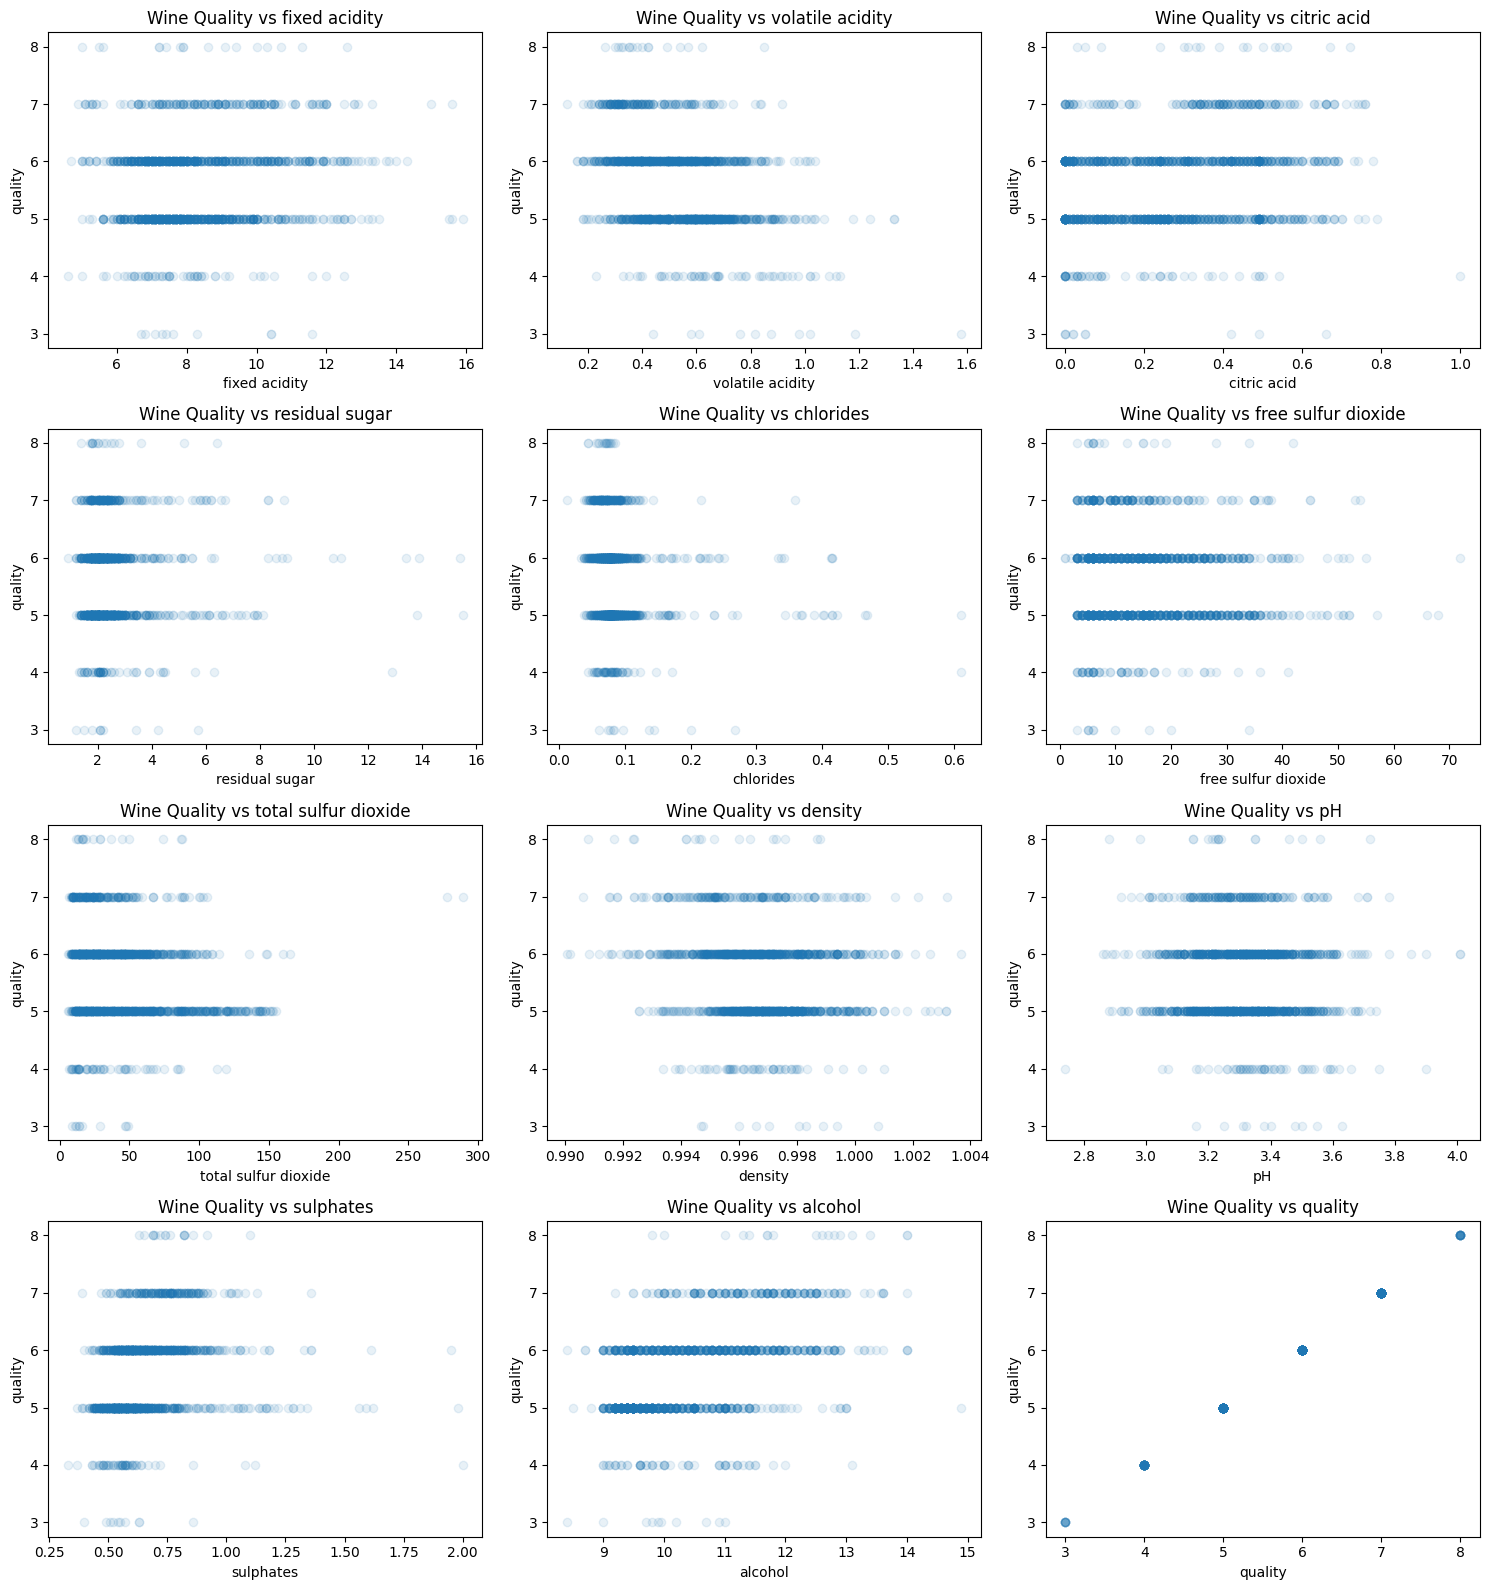

In [26]:
# Exploratory Analysis By Creating Column vs Target Scatter Plots

fig,axs = plt.subplots(n_rows,n_cols,figsize=(5* n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(column_list):

    ax=axs[i]

    ax.scatter(df_without_duplicates[col],df_without_duplicates["quality"], alpha=0.10)
    ax.set_xlabel(col)
    ax.set_ylabel('quality')
    ax.set_title(f'Wine Quality vs {col}', fontsize=12)

plt.tight_layout()
plt.show(); 

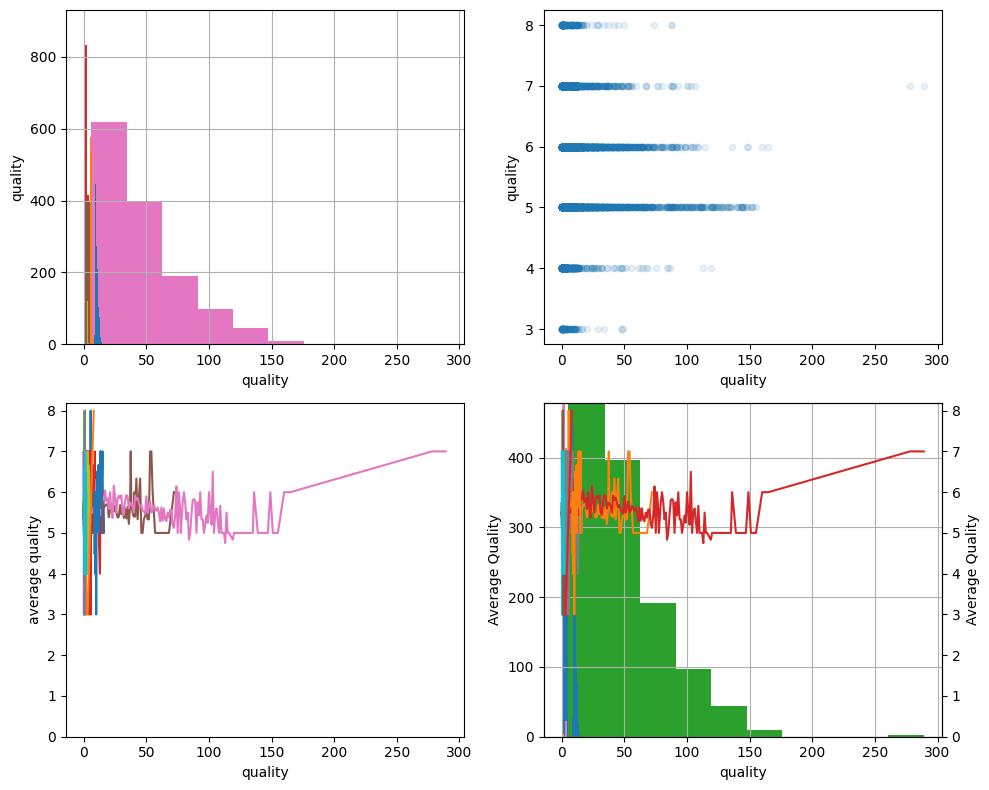

In [27]:
# Exploratory Analysis By Creating Multiple Charts in One

n_cols = 2
n_rows = 2

plt.figure(figsize=(5* n_cols, 4 * n_rows))
for i, col in enumerate(column_list):
    plt.subplot(n_rows, n_cols, 1)
    df_without_duplicates[col].hist()
    plt.xlabel(col)
    plt.ylabel('quality')

    plt.subplot(n_rows, n_cols, 2)
    df_without_duplicates.plot.scatter(col, "quality", alpha=0.10, ax=plt.gca())
    plt.xlabel(col)
    plt.ylabel('quality')

    plt.subplot(n_rows, n_cols, 3)
    df_without_duplicates_wine = df_without_duplicates.groupby(col)["quality"].mean()
    df_without_duplicates_wine.plot(y='quality')
    plt.ylabel('average quality')
    plt.gca().set_ylim(0)

    plt.subplot(n_rows, n_cols, 4)
    df_without_duplicates[col].hist(label='count')
    plt.ylabel('Wine Count')
    df_without_duplicates_wine.plot(y='quality', secondary_y=True)   
    plt.ylabel('Average Quality')
    plt.gca().set_ylim(0)

plt.tight_layout()
plt.show(); 
None; 

Repeat of Individual Charts from Exploratory Analysis and Explaination of What Made Them Interesting
    - Of the Multiple Charts Completed in Exploratory Analysis these three were the most interesting

Explaination of Interesting For Chart One.


Histograms can be used to highlight dummy data, weird spikes in data and missing data. 
The histograms shown below help to give an indication about how the data in each of the columns is
distributed. Looking at the histograms below helped me to determine how columns and data could be
used together. Altough, the historgrams did not directly show correlation of the columns
it did give a good indication on how the scatter matrix might appear.



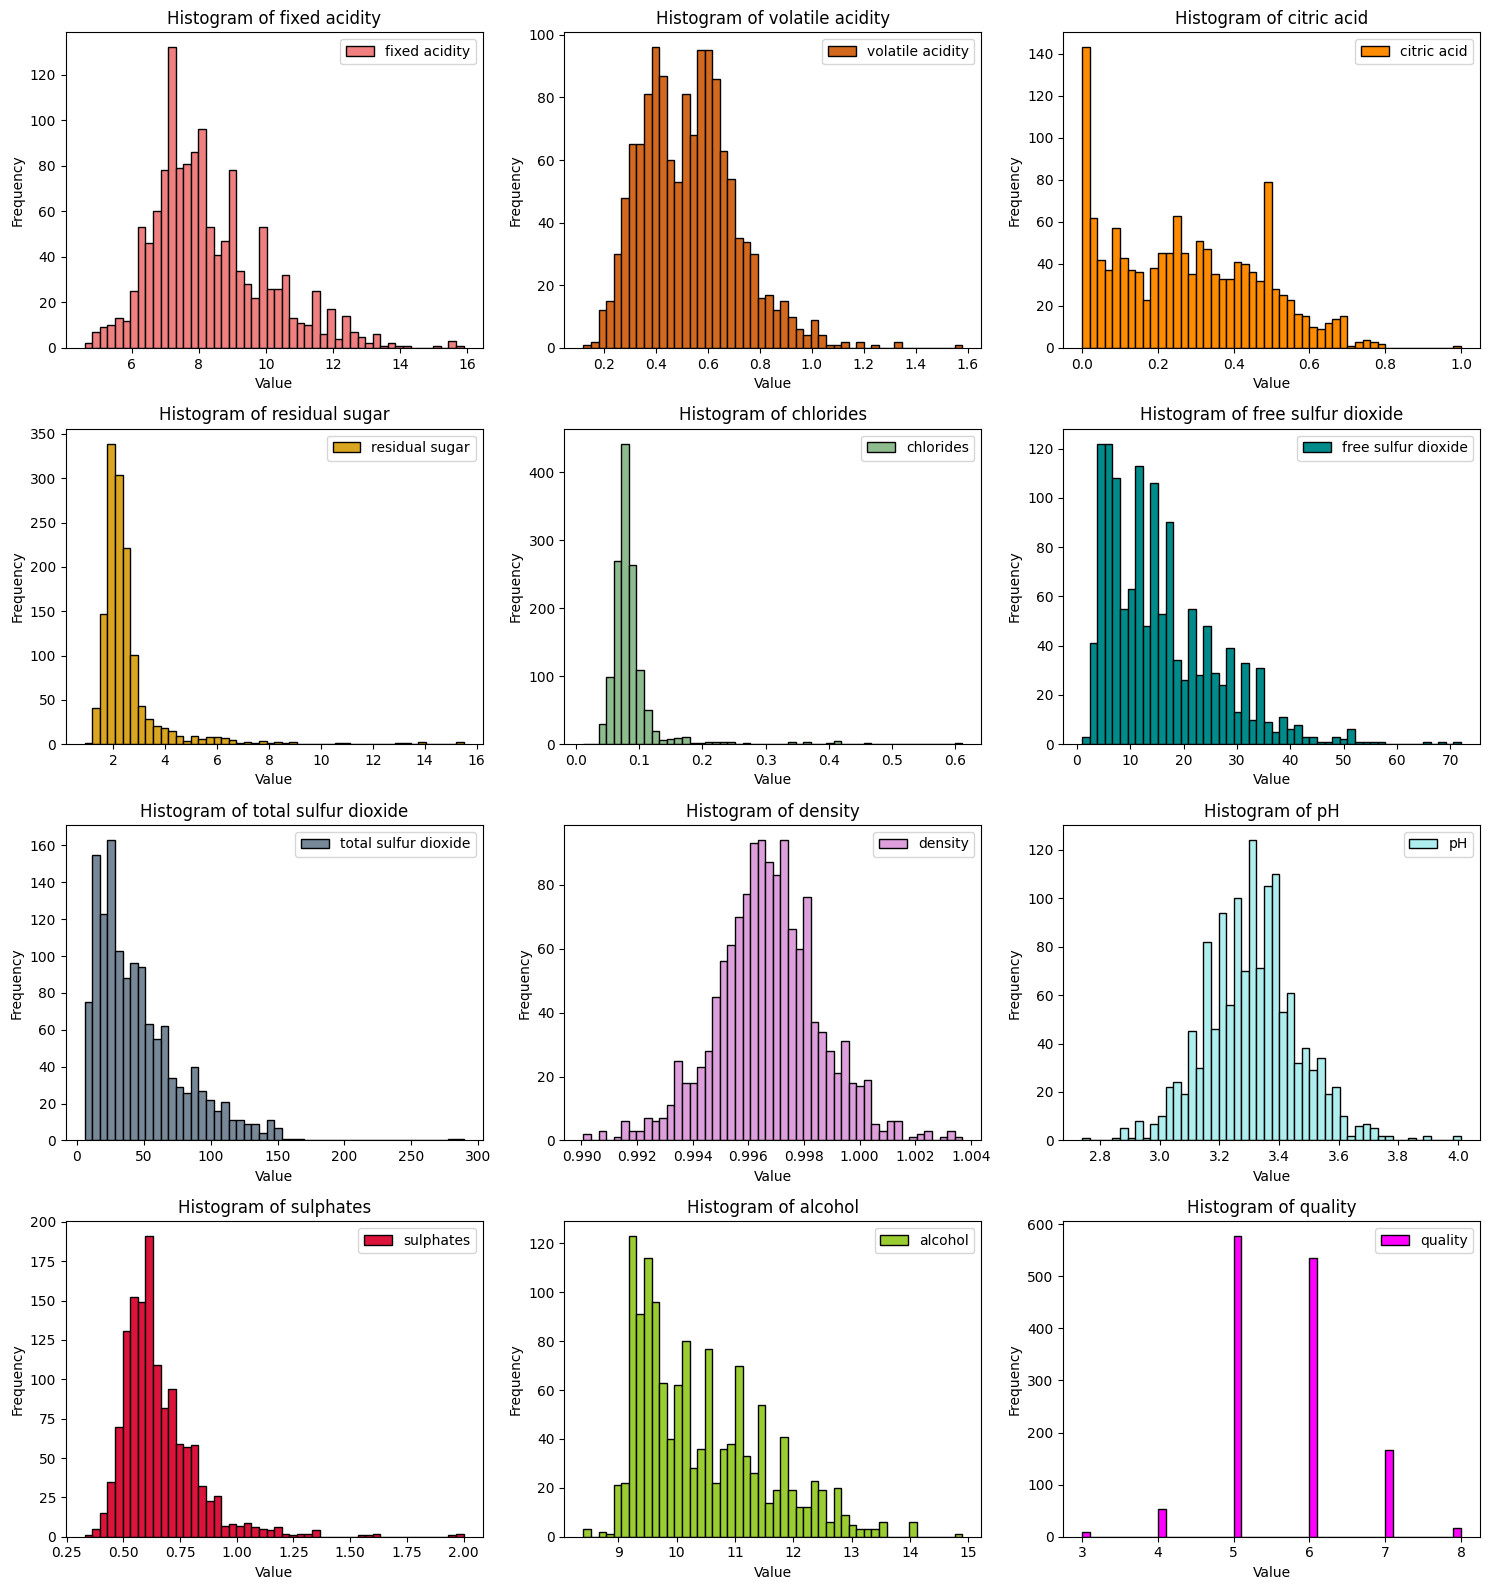

In [28]:
# Histogram Chart

print('Explaination of Interesting For Chart One.''\n\n') 

print('Histograms can be used to highlight dummy data, weird spikes in data and missing data. ' '\n'
'The histograms shown below help to give an indication about how the data in each of the columns is' '\n'
'distributed. Looking at the histograms below helped me to determine how columns and data could be' '\n'
'used together. Altough, the historgrams did not directly show correlation of the columns' '\n'
'it did give a good indication on how the scatter matrix might appear.' '\n') # Printed explaination of why this chart was interesting

n_cols = 3 # Number of Columns for Subplots
n_rows = 4 # Number of Rows for Subplots  

fig,axs = plt.subplots(n_rows,n_cols,figsize=(5* n_cols, 4 * n_rows))
axs = axs.flatten()

colors=['lightcoral','chocolate','darkorange','goldenrod','darkseagreen','darkcyan','lightslategrey','plum','paleturquoise','crimson','yellowgreen','fuchsia']  

column_list # List of column names created in earlier Problem

for i, col in enumerate(column_list):
    ax = axs[i]
    ax.hist(df_without_duplicates[col], edgecolor='black', label=col, color=colors[i % len(colors)], bins=50)
    ax.legend();
    ax.set_title(f'Histogram of {column_list[i]}', fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency');

plt.tight_layout()
plt.show(); 


Explaination of Interesting For Chart Two.


Mean Plots can be used to help visualize relationships from the input columns to the target column. 
The mean plots shown below helped to give an indication about how the columns interact with the target column
"quality" and to helped me to identify if their relationship is linear. From these charts I saw that the 
alchol column seemed to have a highest linear relationship with the target column.


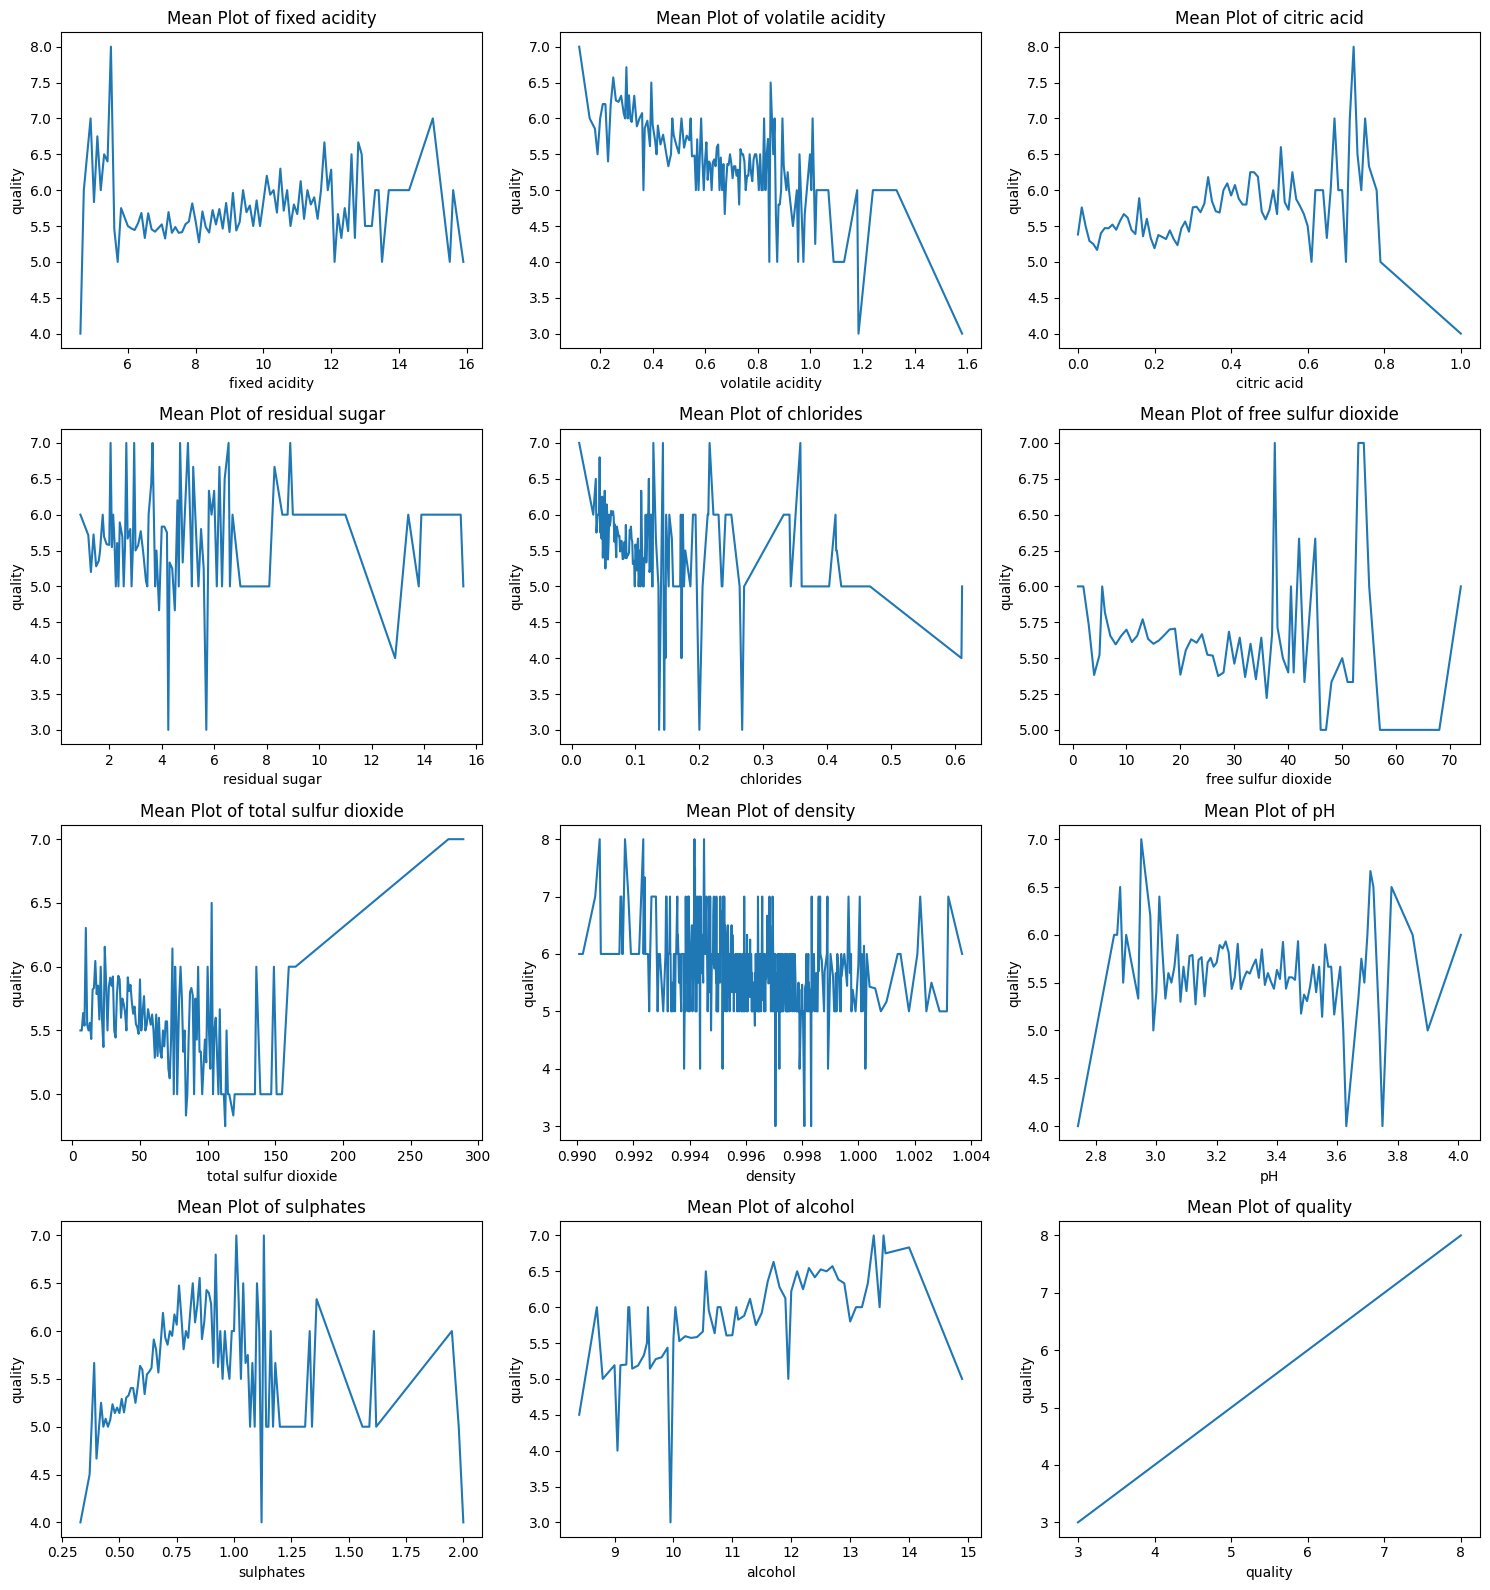

In [30]:
# Mean Plot

print('Explaination of Interesting For Chart Two.''\n\n') 

print('Mean Plots can be used to help visualize relationships from the input columns to the target column. ' '\n'
'The mean plots shown below helped to give an indication about how the columns interact with the target column' '\n'
'"quality" and to helped me to identify if their relationship is linear. From these charts I saw that the ' '\n'
'alchol column seemed to have a highest linear relationship with the target column.') # Printed explaination of why this chart was interesting

n_cols = 3 # Number of Columns for Subplots
n_rows = 4 # Number of Rows for Subplots

plt.figure(figsize=(5* n_cols, 4 * n_rows))
for i, col in enumerate(column_list):
    plt.subplot(n_rows, n_cols, i + 1)
    df_w = df_without_duplicates.groupby(col)['quality'].mean()
    df_w.plot(y='quality')
    plt.title(f'Mean Plot of {column_list[i]}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('quality')

plt.tight_layout()
plt.show(); 


Explaination of Interesting For Chart Three.


The Scatter Matrix helps to visually show the correlation between different pairs of columns
by combining multiple different chart types such as scatter plots and histograms. The colors used 
in the chart made it easy of me to see how this data could be grouped together and made it easier
to spot outliers


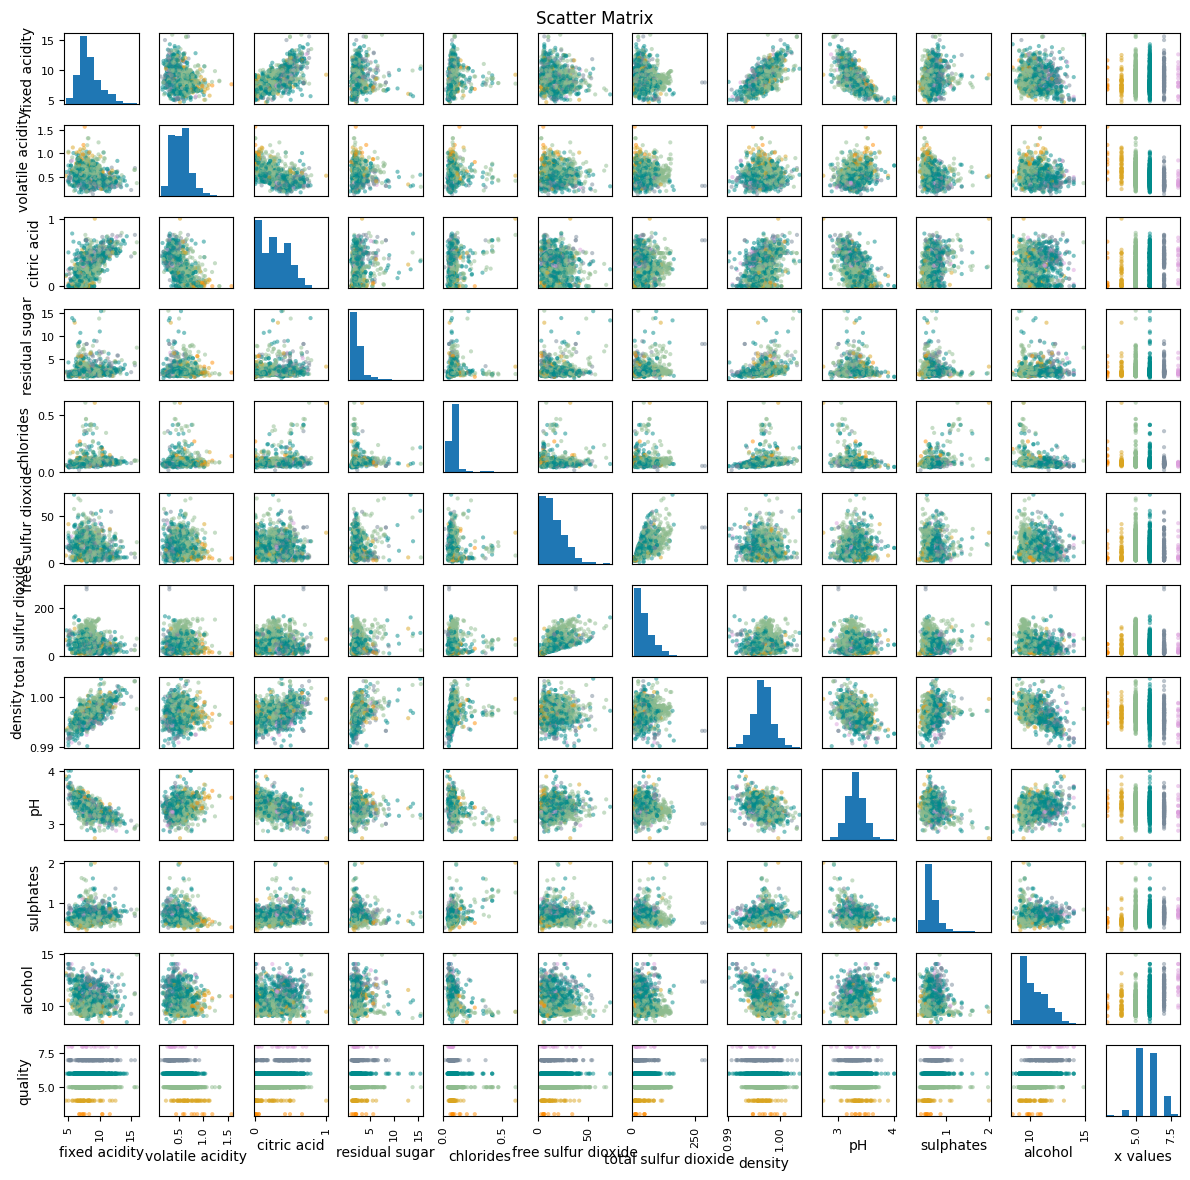

In [31]:
# Scatter Matrix

print('Explaination of Interesting For Chart Three.''\n\n') 

print('The Scatter Matrix helps to visually show the correlation between different pairs of columns' '\n'
'by combining multiple different chart types such as scatter plots and histograms. The colors used ' '\n'
'in the chart made it easy of me to see how this data could be grouped together and made it easier' '\n' 
'to spot outliers') # Printed explaination of why this chart was interesting

quality_map = {1: 'lightcoral',2: 'chocolate',3: 'darkorange',4: 'goldenrod',5: 'darkseagreen',6: 'darkcyan',7: 'lightslategrey',8: 'plum',9: 'paleturquoise',10: 'crimson',11: 'yellowgreen',12: 'fuchsia'}  
df_colored = df_without_duplicates['quality'].map(quality_map).values
pd.plotting.scatter_matrix(df_without_duplicates, color=df_colored, figsize=(12,12))
plt.suptitle('Scatter Matrix')
plt.xlabel('x values')
plt.ylabel('y values')
plt.tight_layout();


YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [ ]:
# Correlation Matrix of Numeric Columns 
# Confirmed from previous datatype search that dataset only contains float and int value types. 



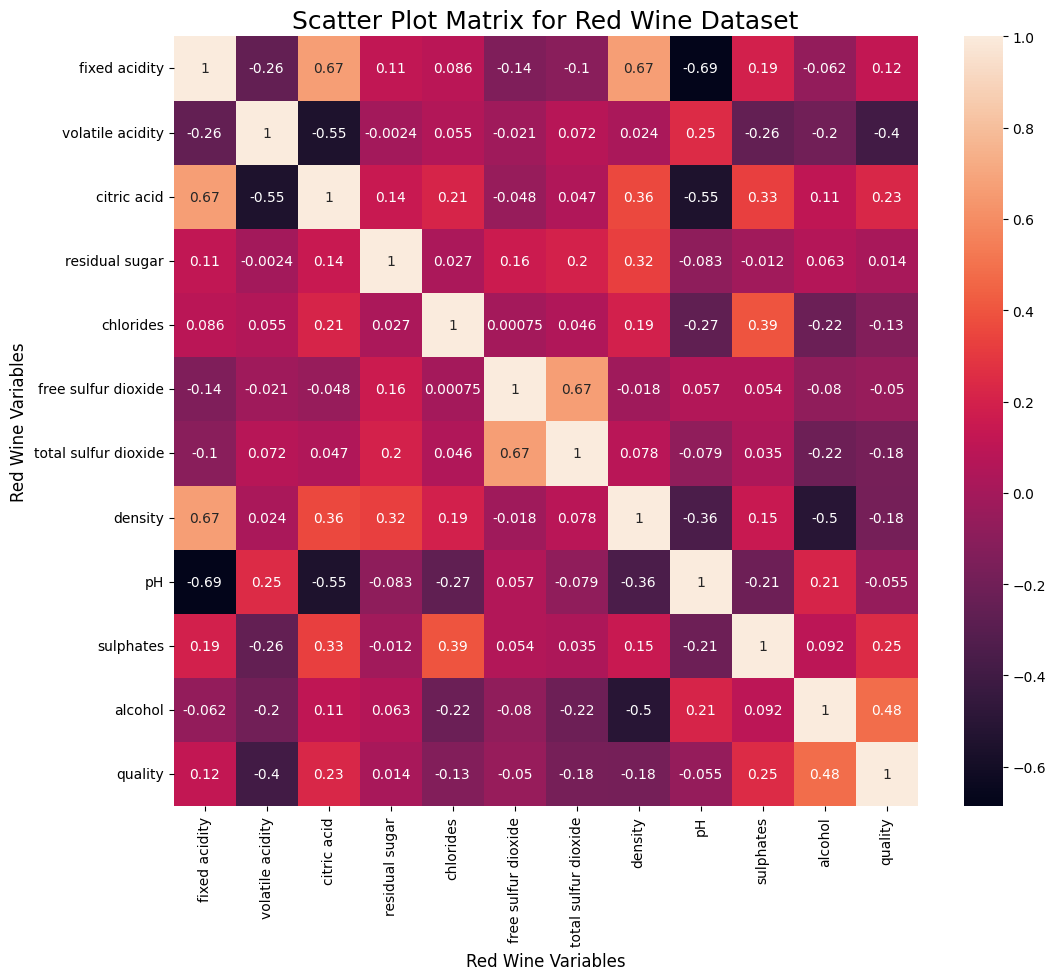

In [ ]:
### Look into pairwise correlation using all df_without_duplicates variable

plt.figure(figsize=(12,10)) ## Increase figure size as annotations are not showing up correctly by default in heatmap.
sns.heatmap(df_without_duplicates.corr(), annot=True) # Create heatmap chart to look into the correlation between columns and give a visualation on how the columns affect each other.
### Could change the color of the heatmap, but the default color is cool and looks easy to read
### Also debated changing the .corr numbers to be formatted with only 2 digits by adding fmt='.2f' but some of the values change to just 0.00 so leaving as default
plt.title('Correlation Matrix for Red Wine Dataset', fontsize=18)
plt.xlabel('Red Wine Variables', fontsize=12)
plt.ylabel('Red Wine Variables', fontsize=12);

### Based on heatmap and annotations will write the pair of columns that have the greatest postive or negative correlations
### Will start the search with anything greater than .50 (postive) or lower than -.50 (negative)


### Columns highlighted with the high postive correlation (>= 0.5)
    ## Fixed acidity and Denisty (0.67)
    ## Fixed acidity and Citric Acid (0.67)
    ## Free Sulfur Dioxide and Total Sulfur Dioxide (0.67)

     ## **** All columns mentioned above have the same positive correlation


### Columns highlighted with the high negative correlation (<= -0.5) 
    ## Fixed acidity and Ph (-0.69)
    ## Volatile acidity and Citric Acid (-0.55)
    ## Citric Acid and Ph (-0.55)
    ## Density and Alchol (-0.5)

    ## **** The columns with the highest negative correlation are Fixed acidity and Ph (-0.69)
    
### Based on analysis above the most correlated are Fixed acidity and Ph (-0.69)


YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [9]:
#### Pick 3 Regression Model Classes from scikit-learn documentation (just pick will build in Problem 6)

#### Regression Model Class 1 - LinearRegression
    ### Provide a link to scikit-learn documentation
        ## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
    ### Provide a link to non scikit-learn documentation website describing how model works
        ## https://www.datacamp.com/tutorial/sklearn-linear-regression

#### Regression Model Class 2 - RandomForestRegressor
    ### Provide a link to scikit-learn documentation
        ## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    ### Provide a link to non scikit-learn documentation website describing how model works
        ## https://www.analytixlabs.co.in/blog/random-forest-regression/

#### Regression Model Class 3 - GradientBoostingRegressor
    ### Provide a link to scikit-learn documentation
        ## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
    ### Provide a link to non scikit-learn documentation website describing how model works
        ## https://www.datarobot.com/blog/gradient-boosted-regression-trees/


YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression L1 (MAE) Loss: 0.5067213236184596
Linear Regression L2 (MSE) Loss: 0.43120484332749554


Random Forest Regressor L1 (MAE) Loss: 0.17885945548197205
Random Forest Regressor L2 (MSE) Loss: 0.05570573951434878
Gradient Boosting Regressor L1 (MAE) Loss: 0.4066405924923636
Gradient Boosting Regressor L2 (MSE) Loss: 0.2640121801556321


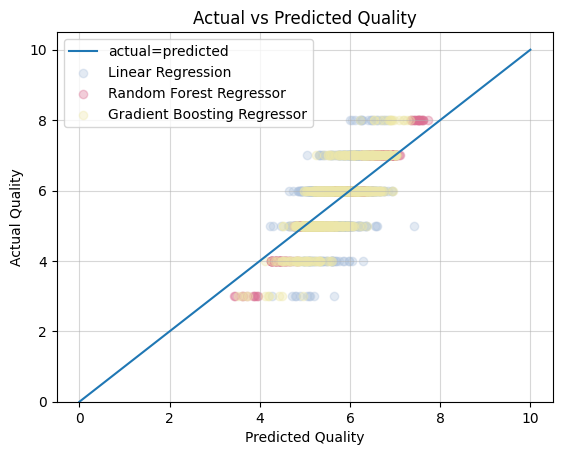

In [29]:
### Seperate Input Features and Output Target

df_target = df_without_duplicates["quality"] # Create variable df_target to store output target column
# df_target # used to check variable results
df_features = df_without_duplicates.drop(["quality"], axis=1)
# df_features # used to check variable results

### Define Functions to Compute L1 and L2 losses for each Class
## L1 Loss usually called Mean Absolute Error (MAE)

def mean_absolute_error(target, actual):
    error = target - actual
    return np.mean(np.abs(error))

## L2 Loss usually called Mean Squared Error (MSE)

def mean_squared_error(target, actual):
    error = target - actual
    error_squared = error * error
    return np.mean(error_squared)

#### Build Three Regression Model Classes
### Building LinearRegression Model

linear_model = sklearn.linear_model.LinearRegression() # Store LinearRegression function in variable linear_model
linear_model.fit(df_features,df_target)

### Checking the R squared score 
linear_model.score(df_features,df_target)

### LinearRegression Predicted Values

linear_prediction = linear_model.predict(df_features)
linear_prediction
linear_prediction.min(), linear_prediction.max() # predicted min and max values
df_target.min(), df_target.max()                 # actual min and max values

### LinearRegression L1 and L2 Losses
linear_mae = mean_absolute_error(linear_prediction, df_target)
linear_mse = mean_squared_error(linear_prediction, df_target)
print(f"Linear Regression L1 (MAE) Loss: {linear_mae}")
print(f"Linear Regression L2 (MSE) Loss: {linear_mse}")

### Building RandomForestRegressor Model

random_model = sklearn.ensemble.RandomForestRegressor() # Store RandomForestRegressor function in variable random_model
random_model.fit(df_features,df_target)

### Checking the R squared score  
random_model.score(df_features,df_target)

### RandomForestRegressor Predicted Values
random_prediction = random_model.predict(df_features)
random_prediction
random_prediction.min(), random_prediction.max() # predicted min and max values 
df_target.min(), df_target.max()                # actual min and max values

### RandomForestRegressor L1 and L2 Losses
random_mae = mean_absolute_error(random_prediction, df_target)
random_mse = mean_squared_error(random_prediction, df_target)
print(f"Random Forest Regressor L1 (MAE) Loss: {random_mae}")
print(f"Random Forest Regressor L2 (MSE) Loss: {random_mse}")


### Building GradientBoostingRegressor Model

gradient_model = sklearn.ensemble.GradientBoostingRegressor()
gradient_model.fit(df_features,df_target)

### Checking the R squared score  
gradient_model.score(df_features,df_target)

### GradientBoostingRegressor Predicted Values
gradient_prediction = gradient_model.predict(df_features)
gradient_prediction
gradient_prediction.min(), gradient_prediction.max() # predicted min and max values 
df_target.min(), df_target.max()                     # actual min and max values

### GradientBoostingRegressor L1 and L2 Losses
gradient_mae = mean_absolute_error(gradient_prediction, df_target)
gradient_mse = mean_squared_error(gradient_prediction, df_target)
print(f"Gradient Boosting Regressor L1 (MAE) Loss: {gradient_mae}")
print(f"Gradient Boosting Regressor L2 (MSE) Loss: {gradient_mse}")


#### Plotting Actual versus Predicted Values for All Models in One Chart


plt.plot([0,10],[0,10], label="actual=predicted")
plt.scatter(linear_prediction, df_target, color="lightsteelblue", label='Linear Regression', alpha=0.35) # why use regular blue when you can use lightsteelblue
# looked through https://matplotlib.org/stable/gallery/color/named_colors.html for colors to use for graph
plt.scatter(random_prediction, df_target, color="palevioletred", label='Random Forest Regressor', alpha=0.35)
plt.scatter(gradient_prediction, df_target, color="palegoldenrod", label='Gradient Boosting Regressor', alpha=0.35)
## Working on changing alpha scale as random_prediction and gradient_prediction have a lot of overlapping in the plots
plt.gca().set_ylim(0)
plt.legend()
plt.title("Actual vs Predicted Quality")
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.grid(True, alpha=0.5)

None





YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [11]:
#### Three Regression Models: Linear Regression,Random Forest Regressor,Gradient Boosting Regressor

### Five Fold Cross-Validation
    ## Evaulate each fold

### Compare L2 Losses Predicted by Cross Validation again L2 losses training against the whole data set

### Linear Regression Cross Validation

scoring = ['r2','neg_mean_squared_error'] # Creating a variable to specify the testing scores that I want used in cross_validate module. R2 and neg_mean_squared_error used to get L2 losses

# linear_train_features, linear_test_features, linear_train_target, Linear_test_target = sklearn.model_selection.train_test_split(df_features,df_target,test_size=0.20, random_state=2024) # commented this like out as this would split to use 20 percent of the dataset for training and the other 80 percent for testing and want to use whole datasset instead
linear_model_cv = sklearn.model_selection.cross_validate(linear_model,df_features,df_target,scoring=scoring,cv=5) #cross validate by default does a 5 fold but just to make it explict will add cv=5. Complete the cross compare on whole datatset instead of part of the dataset
linear_model_cv
linear_cross_r2 = linear_model_cv['test_r2']
linear_cross_r2 = linear_cross_r2.mean()
linear_cross_neg_mse = linear_model_cv['test_neg_mean_squared_error'] # returned as negative values
linear_cross_mse = -linear_cross_neg_mse # multiple negative numbers by negative to get positive values
linear_cross_mse = linear_cross_mse.mean() # Get the average mean squared error loss for cross validation
print(f"Linear Regression Cross Validation R2 score: {linear_cross_r2}")
print(f"Linear Regression Cross Validation L2 (MSE) Loss: {linear_cross_mse}")


#Predict L2 losses 

### Random Forest Regressor Cross Validation

random_model_cv = sklearn.model_selection.cross_validate(random_model,df_features,df_target,scoring=scoring,cv=5) #cross validate by default does a 5 fold but just to make it explict will add cv=5. Complete the cross compare on whole datatset instead of part of the dataset
random_model_cv
random_cross_r2 = random_model_cv['test_r2']
random_cross_r2 = random_cross_r2.mean()
random_cross_neg_mse = random_model_cv['test_neg_mean_squared_error'] # returned as negative values
random_cross_mse = -random_cross_neg_mse # multiple negative numbers by negative to get positive values
random_cross_mse = random_cross_mse.mean() # Get the average mean squared error loss for cross validation
print(f"Random Forest Regressor Cross Validation R2 score: {random_cross_r2}")
print(f"Random Forest Regressor Cross Validation L2 (MSE) Loss: {random_cross_mse}")

### Gradient Boosting Regressor Cross Validation

gradient_model_cv = sklearn.model_selection.cross_validate(gradient_model,df_features,df_target,scoring=scoring,cv=5) #cross validate by default does a 5 fold but just to make it explict will add cv=5. Complete the cross compare on whole datatset instead of part of the dataset
gradient_model_cv
gradient_cross_r2 = gradient_model_cv['test_r2']
gradient_cross_r2 = gradient_cross_r2.mean()
gradient_cross_neg_mse = gradient_model_cv['test_neg_mean_squared_error'] # returned as negative values
gradient_cross_mse = -gradient_cross_neg_mse # multiple negative numbers by negative to get positive values
gradient_cross_mse = gradient_cross_mse.mean() # Get the average mean squared error loss for cross validation
print(f"Gradient Boosting Regressor Cross Validation R2 score: {gradient_cross_r2}")
print(f"Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: {gradient_cross_mse}")

print('\n\n')

print(f"Compare Predicted VS Cross Validation L2 (MSE) Losses:")
print(f"Linear Regression Predicted L2 (MSE) Loss: {linear_mse}")
print(f"Linear Regression Cross Validation L2 (MSE) Loss: {linear_cross_mse}")
print(f"Random Forest Regressor Predicted L2 (MSE) Loss: {random_mse}")
print(f"Random Forest Regressor Cross Validation L2 (MSE) Loss: {random_cross_mse}")
print(f"Gradient Boosting Regressor Predicted L2 (MSE) Loss: {gradient_mse}")
print(f"Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: {gradient_cross_mse}")





Linear Regression Cross Validation R2 score: 0.29000919202879427
Linear Regression Cross Validation L2 (MSE) Loss: 0.45289729283317615
Random Forest Regressor Cross Validation R2 score: 0.3021073948468497
Random Forest Regressor Cross Validation L2 (MSE) Loss: 0.44806652512481004
Gradient Boosting Regressor Cross Validation R2 score: 0.3199308108289662
Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: 0.4351392328353949



Compare Predicted VS Cross Validation L2 (MSE) Losses:
Linear Regression Predicted L2 (MSE) Loss: 0.43120484332749554
Linear Regression Cross Validation L2 (MSE) Loss: 0.45289729283317615
Random Forest Regressor Predicted L2 (MSE) Loss: 0.05723789551140544
Random Forest Regressor Cross Validation L2 (MSE) Loss: 0.44806652512481004
Gradient Boosting Regressor Predicted L2 (MSE) Loss: 0.2640121801556321
Gradient Boosting Regressor Cross Validation L2 (MSE) Loss: 0.4351392328353949


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
#### Preprocess the data so each column has mean 0 and standard deviation 1
### Build 3 different regression models using sk-learn pipeline for each model (As per Piazza Answer: You should use the same models with standardized data)
### Compare L2 Losses Predicted vs Preprocessed data


df_inputs = df_without_duplicates.drop(['quality'], axis=1)
df_targets = df_without_duplicates['quality']


###Standard Linear Regression Model Testing


standard_scaler = sklearn.preprocessing.StandardScaler() ## Standardize data to have mean of 0 and std of 1
pca = sklearn.decomposition.PCA()
linear_regression = sklearn.linear_model.LinearRegression()

pipeline = sklearn.pipeline.make_pipeline(standard_scaler,pca, linear_regression)
pipeline

pipeline.fit(df_inputs, df_targets)
linear_pipeline_r2 = pipeline.score(df_inputs,df_targets) # Average R squared score
linear_pipeline_predictions = pipeline.predict(df_inputs)
linear_pipeline_mse = sklearn.metrics.mean_squared_error(df_targets, linear_pipeline_predictions)

### Standard Random Forest Model Testing 


standard_scaler = sklearn.preprocessing.StandardScaler() ## Standardize data to have mean of 0 and std of 1
pca = sklearn.decomposition.PCA()
random_regressor = sklearn.ensemble.RandomForestRegressor()

pipeline = sklearn.pipeline.make_pipeline(standard_scaler,pca, random_regressor)
pipeline

pipeline.fit(df_inputs, df_targets)
random_pipeline_r2 = pipeline.score(df_inputs,df_targets) # Average R squared score
random_pipeline_predictions = pipeline.predict(df_inputs)
random_pipeline_mse = sklearn.metrics.mean_squared_error(df_targets, random_pipeline_predictions)

### Standard Gradient Boosting Model Testing 


standard_scaler = sklearn.preprocessing.StandardScaler() ## Standardize data to have mean of 0 and std of 1
pca = sklearn.decomposition.PCA()
gradient_regressor = sklearn.ensemble.GradientBoostingRegressor()

pipeline = sklearn.pipeline.make_pipeline(standard_scaler,pca, gradient_regressor)
pipeline

pipeline.fit(df_inputs, df_targets)
gradient_pipeline_r2 = pipeline.score(df_inputs,df_targets) # Average R squared score
gradient_pipeline_predictions = pipeline.predict(df_inputs)
gradient_pipeline_mse = sklearn.metrics.mean_squared_error(df_targets, gradient_pipeline_predictions)


print(f"Compare Non-preprocessed VS Preprocessed Pipeline L2 (MSE) Losses:")

## There is no variance in the LS Losses for non-preprocessed and preprocessed data using the Linear Regression model 
print(f"Linear Regression Non-preprocessed L2 (MSE) Loss: {linear_mse}")
print(f"Linear Regression Preprocessed Validation L2 (MSE) Loss: {linear_pipeline_mse}")

## There is a greater L2 Loss for preprocessed data than non-preprocessed data using the Random Forest Regressor model
print(f"Random Forest Regressor Non-preprocessed L2 (MSE) Loss: {random_mse}")
print(f"Random Forest Regressor Preprocessed Validation L2 (MSE) Loss: {random_pipeline_mse}")

## There is a lesser L2 Loss for preprocessed data than non-preprocessed data using the Gradient Boosting Redressor model
print(f"Gradient Boosting Regressor Non-preprocessed L2 (MSE) Loss: {gradient_mse}")
print(f"Gradient Boosting Regressor Preprocessed Validation L2 (MSE) Loss: {gradient_pipeline_mse}")




Compare Non-preprocessed VS Preprocessed Pipeline L2 (MSE) Losses:
Linear Regression Non-preprocessed L2 (MSE) Loss: 0.43120484332749554
Linear Regression Preprocessed Validation L2 (MSE) Loss: 0.43120484332749554
Random Forest Regressor Non-preprocessed L2 (MSE) Loss: 0.05570573951434878
Random Forest Regressor Preprocessed Validation L2 (MSE) Loss: 0.05835187637969094
Gradient Boosting Regressor Non-preprocessed L2 (MSE) Loss: 0.2640121801556321
Gradient Boosting Regressor Preprocessed Validation L2 (MSE) Loss: 0.2418332340516134


YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [36]:
# Response for finding better models)

print('Response to Question: \n')
print('This is a valid solution for hyperparameter optimization and can be completed efficiently \n' \
'using the sklearn class RandomizedSearchCV.') # Found the following documentation for RandomizedSearchCV class https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
 

Response to Question: 

This is a valid solution for hyperparameter optimization and can be completed efficiently 
using the sklearn class RandomizedSearchCV.


YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
### From the models that built best model was Linear Regression. The L2 Loses from the Prediction Scores from Random Forest Regressor were good but the Cross Validation L2 losses scores shows there was overfitting occurring during the  

YOUR ANSWERS HERE